# Project 1: fys-stk4155

Import python packages

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from imageio import imread
from resample import resample

## Generate random data and make a plot of using the Franke function

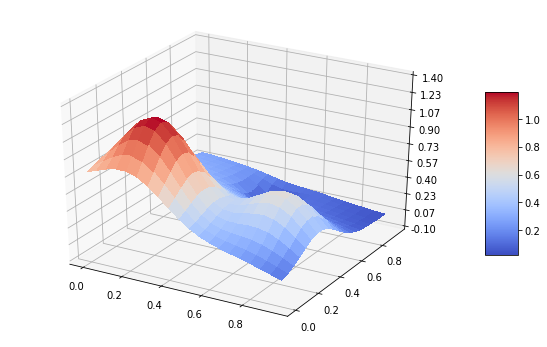

In [20]:
from utils import franke_function
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Select the models

## Select the models in terms of the parameters that minimize the MSE and the R2 scores

Import our functions written for this project

In [21]:
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from utils import generateDesignmatrix

# Generate a random sample to test our code with the Franke function

In [22]:
# we use this seed in order to raplicate the experiment with the same data
np.random.seed(1000)  

# Data
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y) + np.random.normal(0, 0.1, x.shape)

# Experimental setup

## Define the models and the parameters that we want to compare.
The model are Ordinary Least Squares (OLS), Ridge and Lasso.
The parameter are []


In [23]:
models = {
    "ols": algorithms.OLS, 
    'ridge': algorithms.Ridge, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ols': [0],
    'ridge': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],  
    'lasso': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
 
The sample is splitted leaving 80% of the data for training the model and 20% for testing it.

The polynomial order varies from 1 to 5.

The polynomial order is: 1
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 2
Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The polynomial order is: 3
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 4
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 5
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0


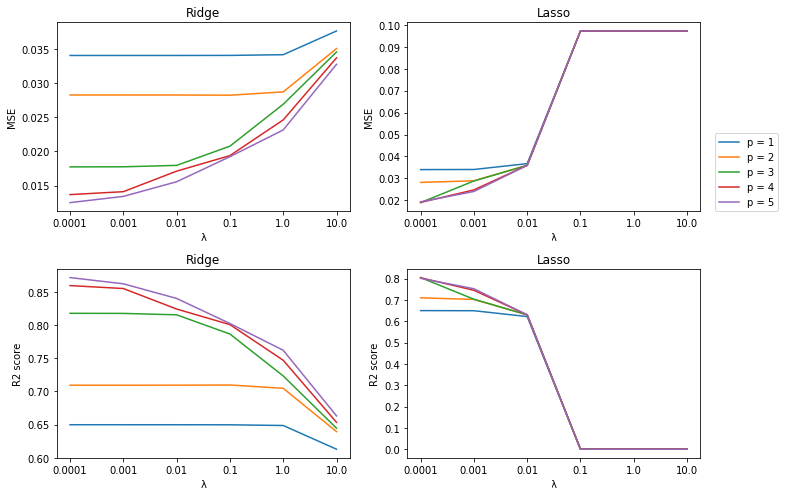

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
1
Testing model: ols
0
Testing model: lasso
0


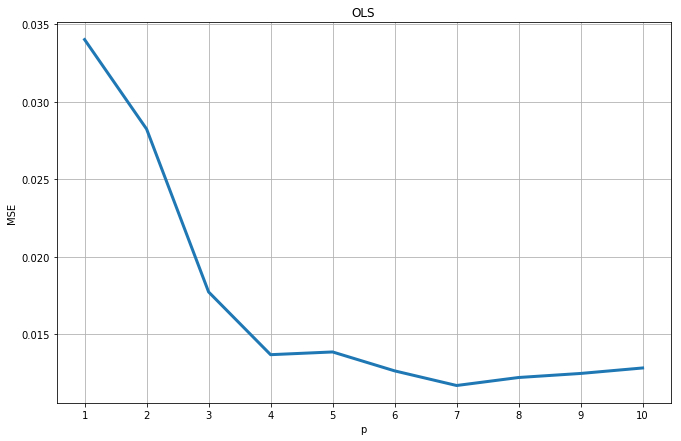

In [24]:
import matplotlib.pyplot as plt
mse_ols = []
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results, z_pred_best = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders

    # Subplot for ridge
    plt.figure(1, figsize = (11,7))
    plt.subplot(221)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(222)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)


     # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.subplot(223)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(224)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    
    mse_ols.append(results["mse"]["ols"][0])

    
#plt.savefig("results/figures/MSEvsLambda/MSEvsLambda_seed105.png")
plt.tight_layout()    
plt.show()

mse_ols = []
for p in np.arange(1,11,1):
    X = generateDesignmatrix(p,x,y)
    
    results, z_pred_best = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    mse_ols.append(results["mse"]["ols"][0])

    # Plot MSE for OLS
p = np.arange(1,11,1)

plt.figure(2, figsize = (11,7))
# log x-axis
plt.plot(p, mse_ols, linewidth=3.0) # plot ridge
ax = plt.gca()
plt.xticks(p)
ax.set_title("OLS")
plt.xlabel('p')
plt.ylabel('MSE')
plt.grid(True)
#plt.savefig("results/figures/MSEvsLambda/OLS_MSEvsLambda_seed105_p10.png")
    
    

In [25]:
#results
mse_ols

[[0.03402639707119806],
 [0.028248167206101075],
 [0.01772981232266399],
 [0.013678393462885732],
 [0.013854353534597363],
 [0.012633475469867029],
 [0.011687951700521632],
 [0.012204670747862295],
 [0.012466028462044839],
 [0.012820180965135406]]

In [26]:
X

array([[1.00000000e+00, 6.53589585e-01, 1.56529182e-01, ...,
        1.53947548e-07, 3.68691366e-08, 8.82984664e-09],
       [1.00000000e+00, 1.15006943e-01, 5.71938588e-01, ...,
        1.51440946e-04, 7.53127753e-04, 3.74536365e-03],
       [1.00000000e+00, 9.50282864e-01, 6.32850997e-01, ...,
        2.32336555e-02, 1.54727004e-02, 1.03042097e-02],
       ...,
       [1.00000000e+00, 5.05852235e-01, 6.69425075e-01, ...,
        1.03196068e-02, 1.36565643e-02, 1.80725634e-02],
       [1.00000000e+00, 2.41323305e-01, 4.98998686e-01, ...,
        2.23868890e-04, 4.62907145e-04, 9.57180896e-04],
       [1.00000000e+00, 9.71298188e-01, 5.46230361e-01, ...,
        7.47673250e-03, 4.20470083e-03, 2.36460366e-03]])

In [27]:
z.shape


(1000,)

# Resample to estimate bias and variance

Now that we have selected the penalisation parameter tha gives the lowest MSE score, we can estimate the bias and the variance of the models by using the bootstrap resampling technique. We do this for the best 3 models, 

In [93]:
# Experimental setup
models = {
    "ols": algorithms.OLS, 
    'ridge': algorithms.Ridge, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ols': [0],
    'ridge': [0.01],  
    'lasso': [0.01]
}
nboots = 100

In [94]:
z_test, z_pred_test, bias, var, beta, mse_test, mse_train = resample(models, lmd, X, z, nboots, split_size = 0.2)

### We conclude from the first part that our best model is the OLS, therefore we continue the analysis only for that model.


In [89]:
print('{} >= {} + {} = {}'.format(mse_test['ols'], bias['ols'], var['ols'], bias['ols']+var['ols']))
print(z_test['ridge'].shape, np.mean(z_pred_test['ridge']).shape)

2.2567754728102227 >= 2.2343057716066106 + 0.022469701203611723 = 2.2567754728102223
(600, 1) ()


Text(0.5,1,'Compare prediction to original data for the OLS approach')

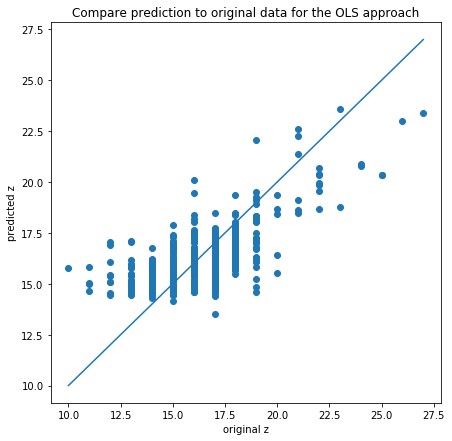

In [102]:

plt.figure(1, figsize = (7,7))
z_min = np.min([np.min(z_test['ols']), np.min(np.mean(z_pred_test['ols']))]) # minimum of all z_pred and z_pred_test
z_max = np.max([np.max(z_test['ols']), np.max(np.mean(z_pred_test['ols']))])
x_axis = [z_min, z_max]
plt.scatter(z_test['ols'], np.mean(z_pred_test['ols'], axis=1))
plt.plot(x_axis, x_axis)
plt.xlabel('original z')
plt.ylabel('predicted z')
plt.title('Compare prediction to original data for the OLS approach')


11.0

# Run the code with SRTM data

## We selected images from Flekkefjord (Norway) and Montevideo (Uruguay)


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'r

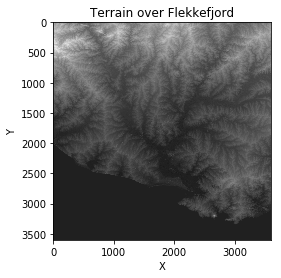

In [31]:
# Load the terrain
terrain_flekkefjord = imread('Montevideo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We subset the data, and generate a squared not singular design matrix.

In [32]:
lengthx = 200
lengthy = 150
terrain_flekkefjord = terrain_flekkefjord[0:lengthx,0:lengthy]
terrain_flekkefjord.shape


x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

x = np.arange(lengthx)
y = np.arange(lengthy)
# Generate a grid
x = np.squeeze(np.tile(x,[1,lengthy] ))
y = np.squeeze(np.tile(y,[1,lengthx] )) 
z = np.ndarray.flatten(terrain_flekkefjord)

p = 5
X = generateDesignmatrix(p,x,y)


In [33]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord, z_pred_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1


In [34]:
results_flekkefjord

{'mse': {'ridge': [[107.24763345545881,
    107.2476337130253,
    107.24763651227735,
    107.24768676890287,
    107.25040175253116,
    107.48550263877921]],
  'lasso': [[108.03929904498554,
    108.03929898428079,
    108.03930217803634,
    108.03971396889642,
    108.06505534223344,
    108.21879817003986]],
  'ols': [[107.24763342693342]]},
 'r2': {'ridge': [[0.050258826982351734,
    0.05025882470144838,
    0.05025879991241711,
    0.050258354860298615,
    0.050234312075830845,
    0.04815235479352442]],
  'lasso': [[0.043248160346550546,
    0.043248160884126974,
    0.04324813260153415,
    0.04324448595011732,
    0.04302007311354916,
    0.04165858951788015]],
  'ols': [[0.050258827234961]]}}

In [35]:
models.items

<function dict.items>

Follow example in Piazza

x (3000, 1) y (3000, 1) z (3000, 1)
patch 1, from (1928, 1665) to (1978, 1725)
mse: 5.0587
R2: 0.580235
variance: 6.99257
bias: 12.0513



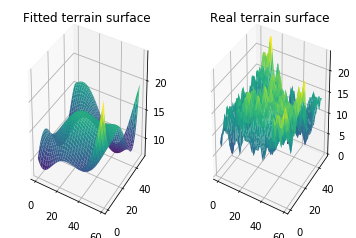

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4
x (3000, 1) y (3000, 1) z (3000, 1)
patch 2, from (3223, 808) to (3273, 868)
mse: 0
R2: nan
variance: 0
bias: 0



c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars


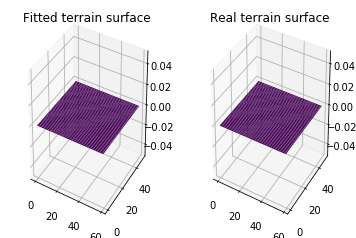

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso


C:\Users\nbpst2\Documents\GitHub\project1\utils.py:86: RuntimeWarning: invalid value encountered in double_scalars
  val = numerator/denominator


0
x (3000, 1) y (3000, 1) z (3000, 1)
patch 3, from (756, 452) to (806, 512)
mse: 4.71105
R2: 0.829264
variance: 22.8816
bias: 27.5926



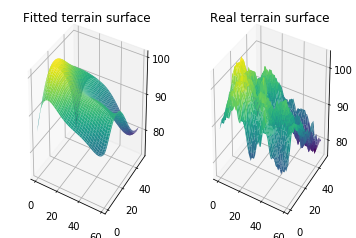

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
4
x (3000, 1) y (3000, 1) z (3000, 1)
patch 4, from (1876, 909) to (1926, 969)
mse: 1.71969
R2: 0.761355
variance: 5.48638
bias: 7.20607



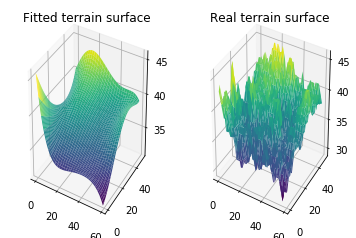

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
4
x (3000, 1) y (3000, 1) z (3000, 1)
patch 5, from (1284, 2372) to (1334, 2432)
mse: 2.24678
R2: 0.449336
variance: 1.83335
bias: 4.08013



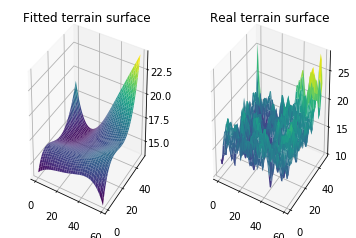

Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
4


In [36]:
import numpy as np
# from scipy.misc import imread
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def surface_plot(surface, title, surface1=None, title1 = None):
    M, N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X, Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    # Plot the predicted and the original surface
    if surface1 is not None:
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.plot_surface(X, Y, surface, cmap=cm.viridis, linewidth=0)
        plt.title(title)

        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.plot_surface(X, Y, surface1, cmap=cm.viridis, linewidth=0)
        plt.title(title1)
    # Plot only the predicted surface
    else:
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, surface, cmap=cm.viridis, linewidth=0)
        plt.title(title)


def predict(rows, cols, beta):
    out = np.zeros((np.size(rows), np.size(cols)))

    for i, y_ in enumerate(rows):
        for j, x_ in enumerate(cols):
            data_vec = np.array([1, x_, y_, x_ ** 2, x_ * y_, y_ ** 2, \
                                 x_ ** 3, x_ ** 2 * y_, x_ * y_ ** 2, y_ ** 3, \
                                 x_ ** 4, x_ ** 3 * y_, x_ ** 2 * y_ ** 2, x_ * y_ ** 3, y_ ** 4, \
                                 x_ ** 5, x_ ** 4 * y_, x_ ** 3 * y_ ** 2, x_ ** 2 * y_ ** 3, x_ * y_ ** 4,
                                 y_ ** 5])  # ,\
            #    x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4, x_*y_**5, y_**6, \
            #    x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4, x_**2*y_**5, x_*y_**6, y_**7, \
            #    x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4, x_**3*y_**5, x_**2*y_**6, x_*y_**7,y_**8, \
            #    x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4, x_**4*y_**5, x_**3*y_**6, x_**2*y_**7,x_*y_**8, y_**9])
            out[i, j] = data_vec @ beta

    return out


from sklearn.metrics import mean_squared_error

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('Montevideo.tif')
    [n, m] = terrain1.shape

    ## Find some random patches within the dataset and perform a fit

    patch_size_row = 50
    patch_size_col = 60

    # Define their axes
    rows = np.linspace(0, 1, patch_size_row)
    cols = np.linspace(0, 1, patch_size_col)

    [C, R] = np.meshgrid(cols, rows)

    x = C.reshape(-1, 1)
    y = R.reshape(-1, 1)

    num_data = patch_size_row * patch_size_col

    # Find the start indices of each patch

    num_patches = 5

    np.random.seed(41555)

    row_starts = np.random.randint(0, n - patch_size_row, num_patches)
    col_starts = np.random.randint(0, m - patch_size_col, num_patches)

    for i, row_start, col_start in zip(np.arange(num_patches), row_starts, col_starts):
        row_end = row_start + patch_size_row
        col_end = col_start + patch_size_col

        patch = terrain1[row_start:row_end, col_start:col_end]

        z = patch.reshape(-1, 1)
        
        print('x', x.shape, 'y', y.shape, 'z', z.shape)

        # Perform OLS fit
        data = np.c_[np.ones((num_data, 1)), x, y, \
                     x ** 2, x * y, y ** 2, \
                     x ** 3, x ** 2 * y, x * y ** 2, y ** 3, \
                     x ** 4, x ** 3 * y, x ** 2 * y ** 2, x * y ** 3, y ** 4, \
                     x ** 5, x ** 4 * y, x ** 3 * y ** 2, x ** 2 * y ** 3, x * y ** 4, y ** 5]  # , \
        # x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4, x*y**5, y**6, \
        # x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4, x**2*y**5, x*y**6, y**7, \
        # x**8, x**7*y, x**6*y**2, x**5*y**3,x**4*y**4, x**3*y**5, x**2*y**6, x*y**7,y**8, \
        # x**9, x**8*y, x**7*y**2, x**6*y**3,x**5*y**4, x**4*y**5, x**3*y**6, x**2*y**7,x*y**8, y**9]

        beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

        fitted_patch = predict(rows, cols, beta_ols)

        mse = np.sum((fitted_patch - patch) ** 2) / num_data
        R2 = 1 - np.sum((fitted_patch - patch) ** 2) / np.sum((patch - np.mean(patch)) ** 2)
        var = np.sum((fitted_patch - np.mean(fitted_patch)) ** 2) / num_data
        bias = np.sum((patch - np.mean(fitted_patch)) ** 2) / num_data

        print("patch %d, from (%d, %d) to (%d, %d)" % (i + 1, row_start, col_start, row_end, col_end))
        print("mse: %g\nR2: %g" % (mse, R2))
        print("variance: %g" % var)
        print("bias: %g\n" % bias)

        surface_plot(fitted_patch, 'Fitted terrain surface', patch, 'Real terrain surface')
        plt.show()
        
        
        
        
        p= 5
        X = generateDesignmatrix(p,np.squeeze(x),np.squeeze(y))
        
        
        results_flekkefjord, z_pred_flekkefjord =  model_comparison0(
            models, param_grid, X, z, split_size=0.2
        )


In [37]:
X.shape


(3000, 21)

In [38]:
rows

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [39]:
import scipy as sp
np.linalg.inv(X.T @ X)

array([[ 7.51235598e-02, -6.20714267e-01, -6.05945598e-01,
         2.00387702e+00,  2.45471662e+00,  1.92774790e+00,
        -3.10533641e+00, -4.16036384e+00, -4.09271559e+00,
        -2.95650697e+00,  2.31401845e+00,  3.24838015e+00,
         3.50667119e+00,  3.15650062e+00,  2.18541036e+00,
        -6.66463893e-01, -9.61972037e-01, -1.09254828e+00,
        -1.07857260e+00, -9.25622478e-01, -6.25239681e-01],
       [-6.20714267e-01,  9.81974749e+00,  2.45471662e+00,
        -4.35578447e+01, -2.23432499e+01, -4.09271559e+00,
         8.23529823e+01,  5.72674148e+01,  2.26945067e+01,
         3.15650062e+00, -7.06357180e+01, -5.82259348e+01,
        -3.19336826e+01, -1.07388681e+01, -9.25622477e-01,
         2.26467623e+01,  2.08158120e+01,  1.36889095e+01,
         6.58301211e+00,  1.85124496e+00, -3.54796335e-10],
       [-6.05945598e-01,  2.45471662e+00,  9.58151372e+00,
        -4.16036384e+00, -2.22234412e+01, -4.23561431e+01,
         3.24838016e+00,  2.29301297e+01,  5.66010429e

In [40]:
print(data.shape)

print(x.shape)

print(y.shape)

print(z.shape)


(3000, 21)
(3000, 1)
(3000, 1)
(3000, 1)


In [41]:


beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

In [42]:
X = generateDesignmatrix(p,np.squeeze(x),np.squeeze(y))

In [43]:
z_pred_flekkefjord['ridge'] .shape




(600, 1)

In [44]:

fitted_patch.shape

(50, 60)

In [45]:
50*60


3000

In [46]:
z_test, z_pred_test, bias, var, beta, mse_test, mse_train = resample(models, lmd, X, z, nboots, split_size = 0.2)